In [1]:
# Import all the required modules
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
# Load the data and remove unnecessary data for now
data = pd.read_csv('Cleaned_data.csv')
keep_column = ['ID', 'CT_Temp', 'CT_CS', 'CT_RT']
data = data[keep_column]

In [3]:
# Show the description of the fetures for reference
f = np.load('features.npy', allow_pickle=True)[()]
f = {k: v for k, v in f.items() if k in keep_column}
for k, v in f.items():
    print('{} : {}'.format(k, v))

ID : Specimen ID
CT_Temp : Creep test temperature (degrees C)
CT_CS : Creep stress (MPa)
CT_RT : Creep rupture time (hours)


In [4]:
# Useful conversion factors
# 1 MPa = 0.145038 ksi

In [5]:
# Plot the stress vs. rupture time for constant temperatures
#for k, g in data.groupby(by=['ID', 'CT_Temp']):
    #plot = g.plot(x='CT_RT', y='CT_CS')
    #plot.show()
    #fig = plot.get_figure()
    #fig.savefig('stress_time_plots/' + '_'.join([str(kk) for kk in k]) + '.png')
    #print('{}\n{}'.format(k, g))
    

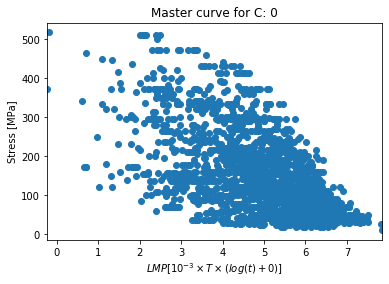

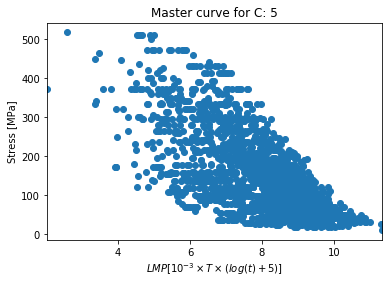

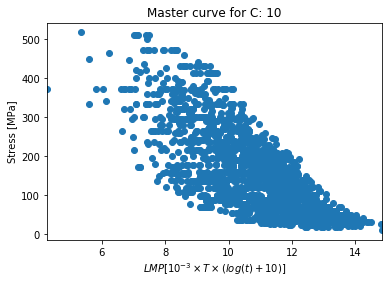

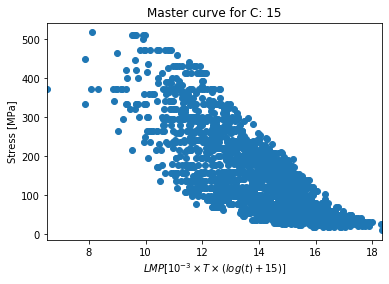

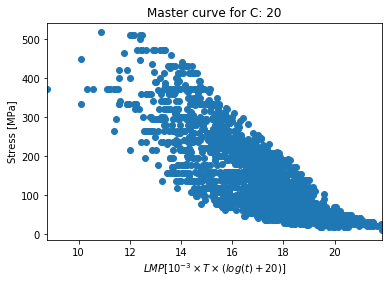

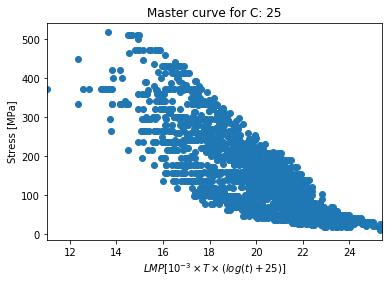

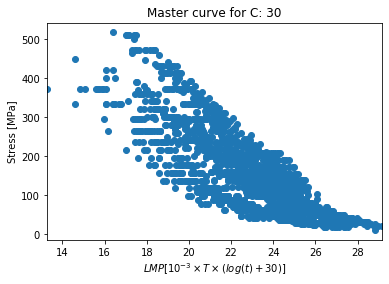

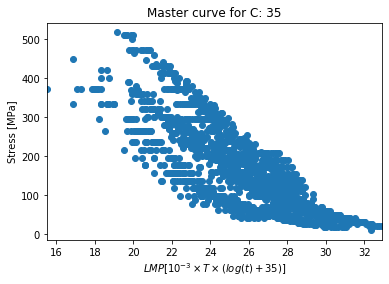

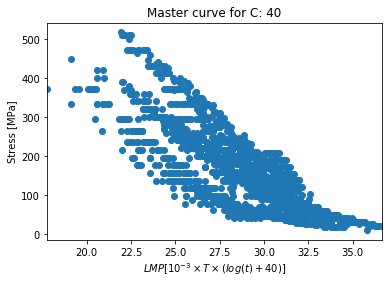

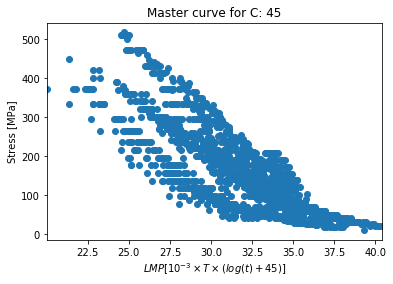

In [6]:
# Plot the Master Curve
for C in range(0, 50, 5):
    data['LMP_{}'.format(C)] = 1e-3 * (data['CT_Temp']) * (np.log(data['CT_RT']) + C)
    ax = data.plot(x='LMP_{}'.format(C), y='CT_CS', style='o', kind='line', title='Master curve for C: {}'.format(C), legend=False)
    ax.set_ylabel('Stress [MPa]')
    ax.set_xlabel(r'$LMP [10^{} \times T \times (log(t) + {})]$'.format('{-3}', C))



/Users/mamu867/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


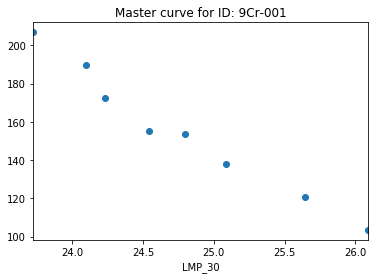

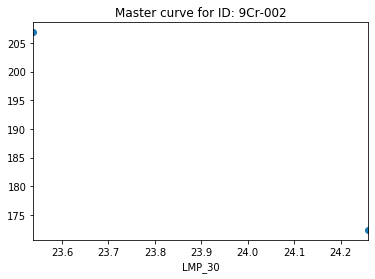

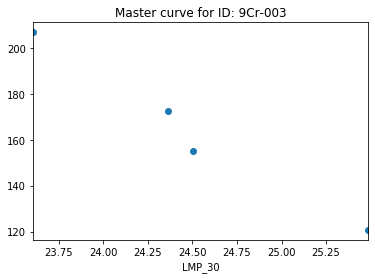

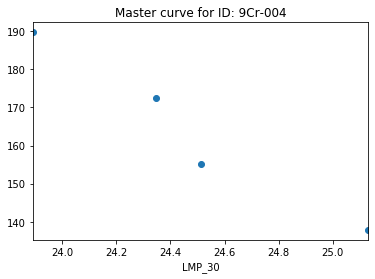

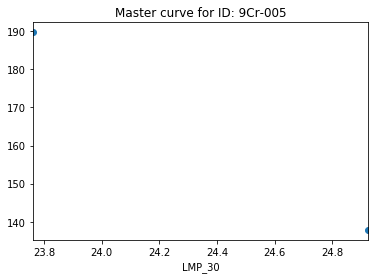

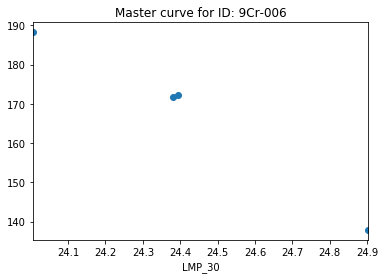

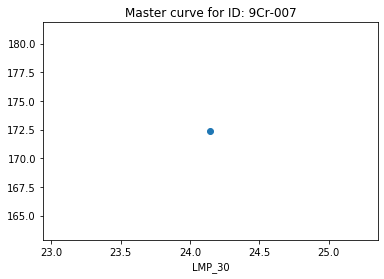

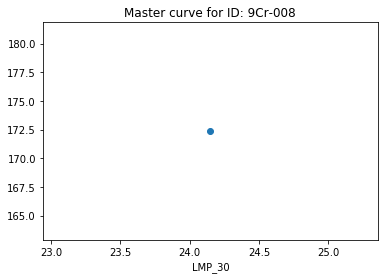

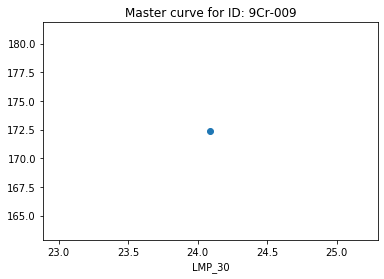

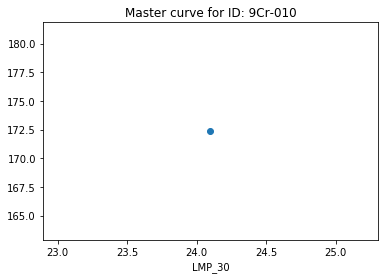

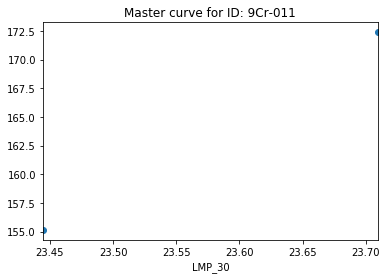

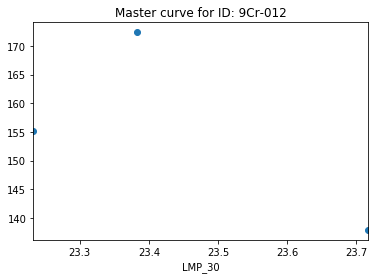

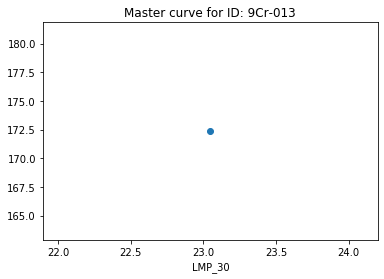

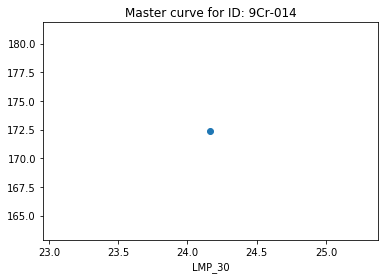

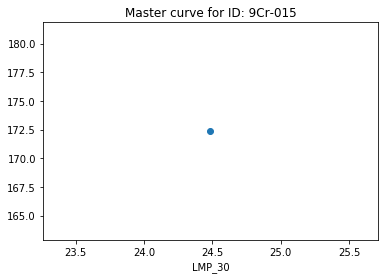

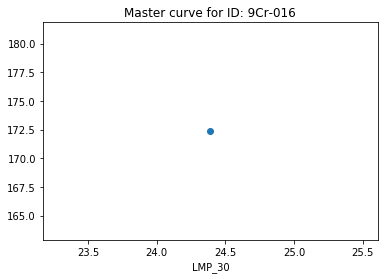

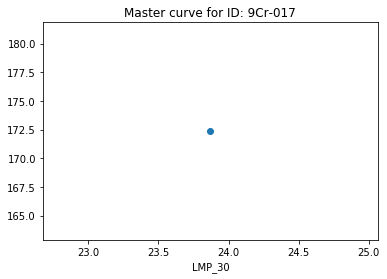

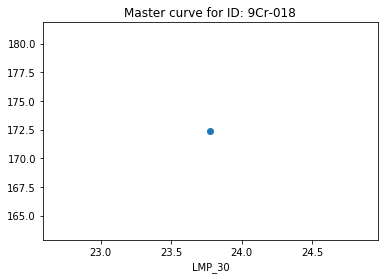

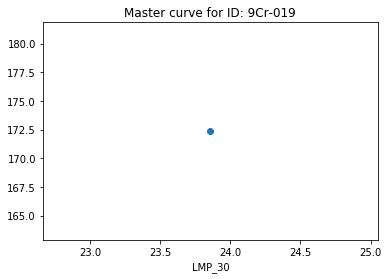

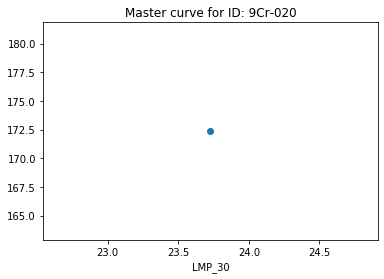

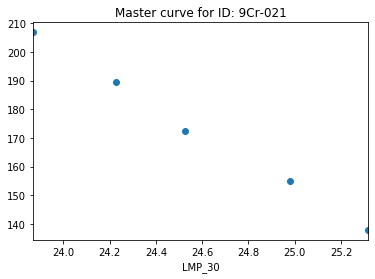

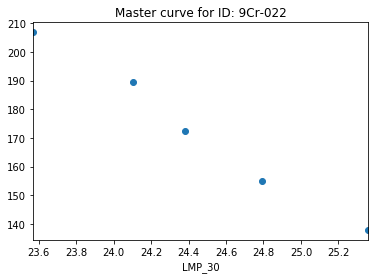

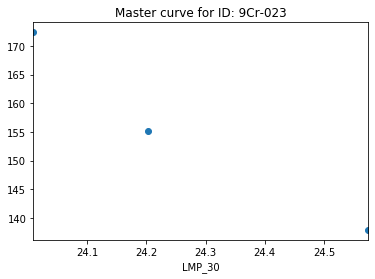

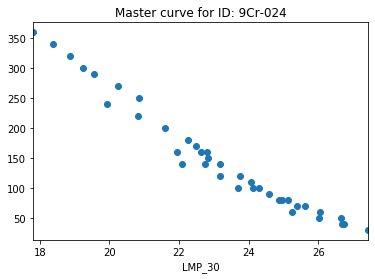

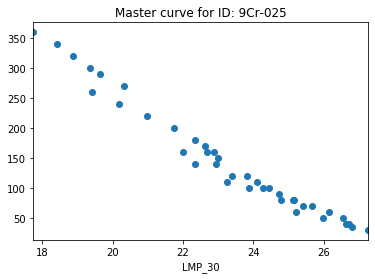

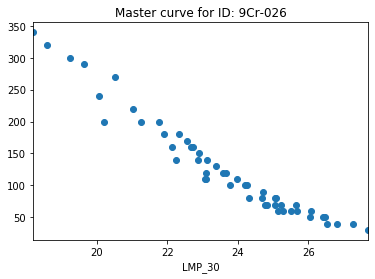

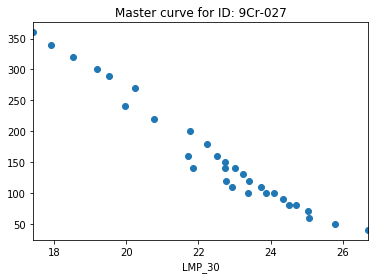

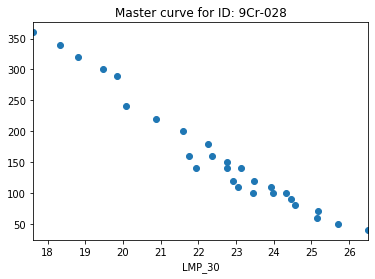

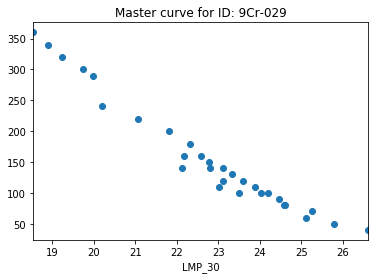

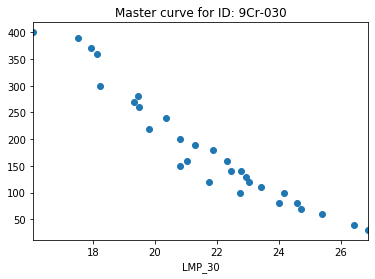

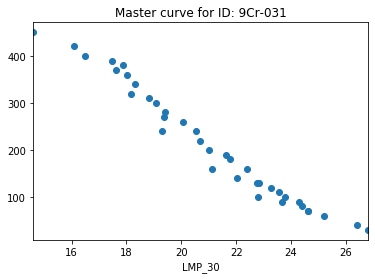

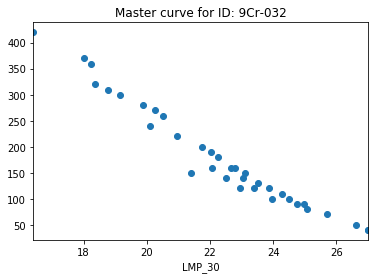

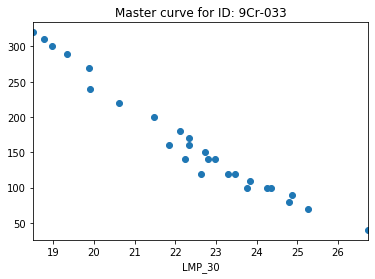

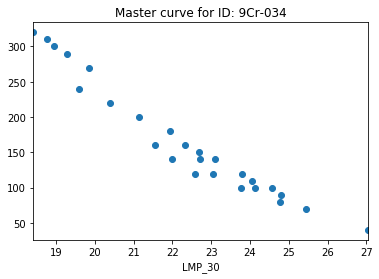

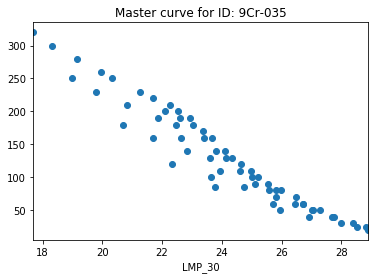

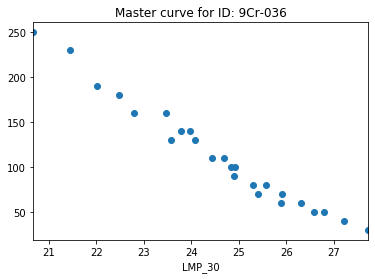

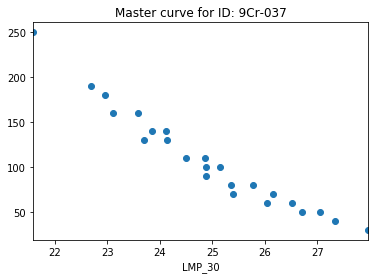

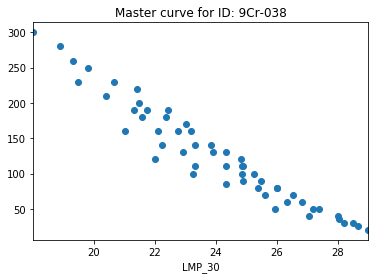

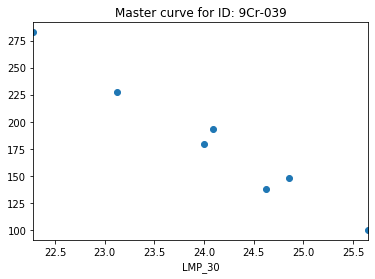

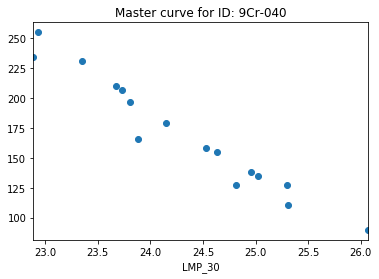

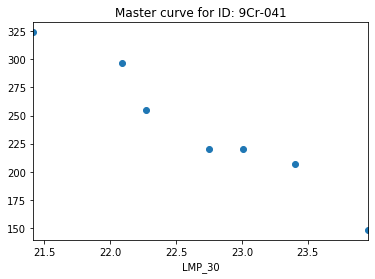

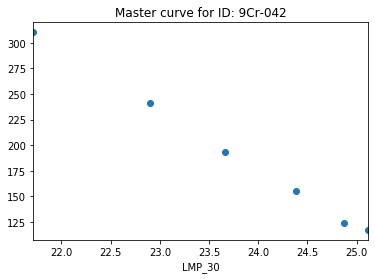

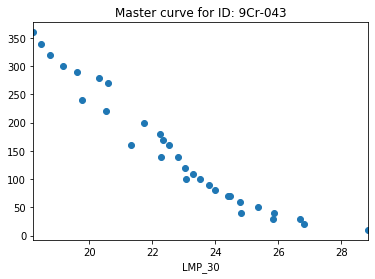

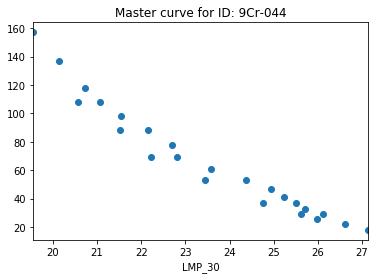

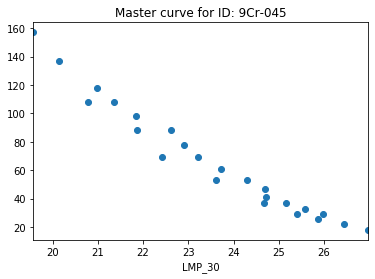

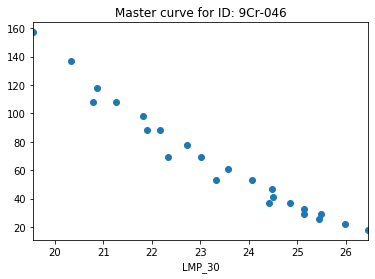

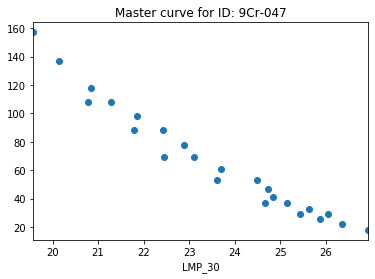

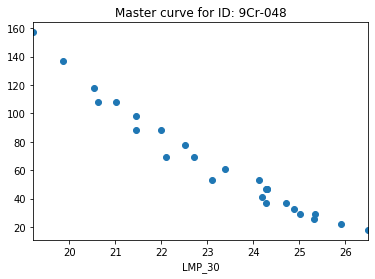

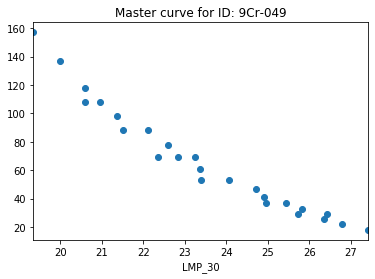

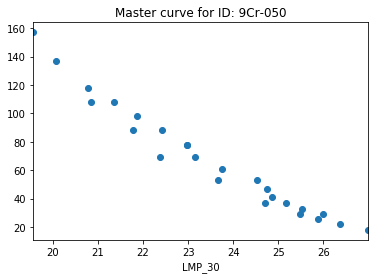

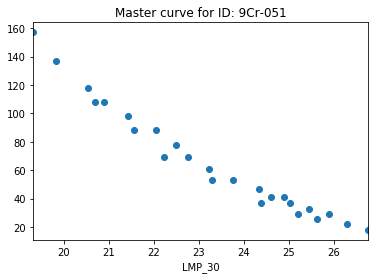

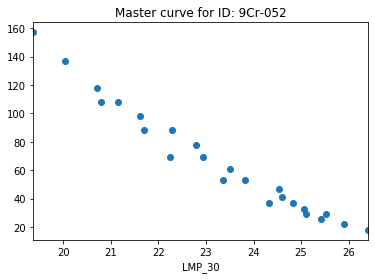

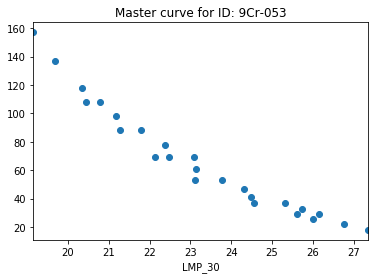

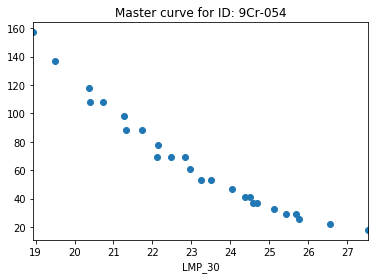

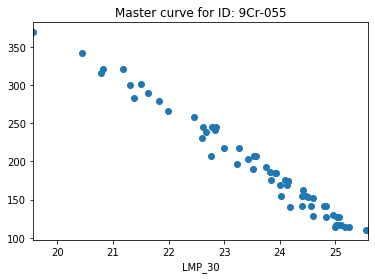

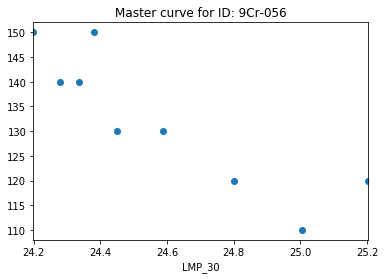

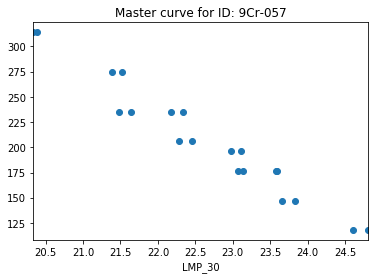

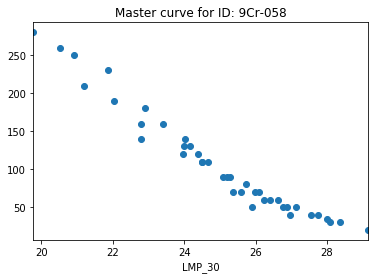

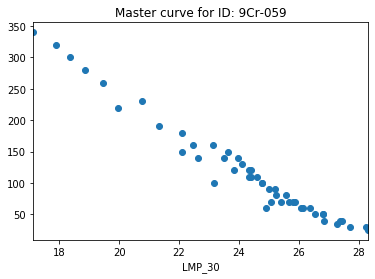

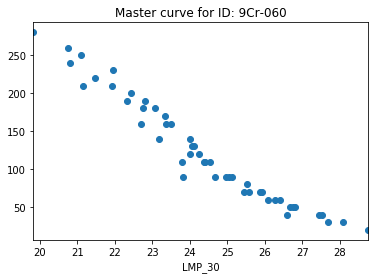

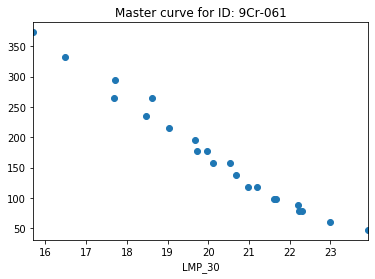

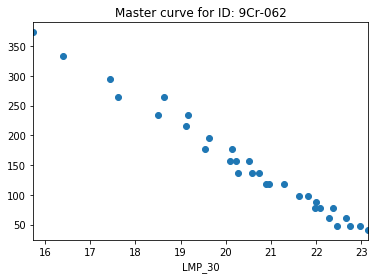

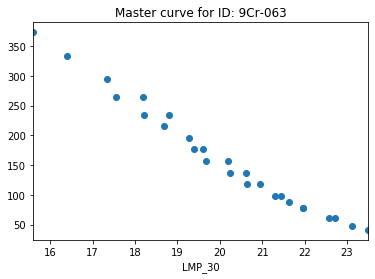

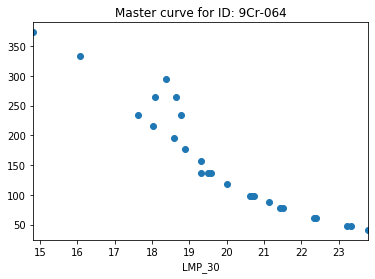

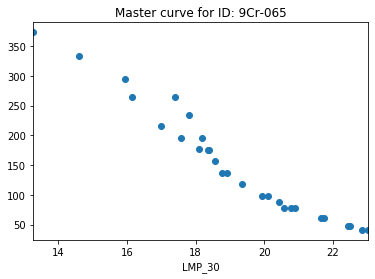

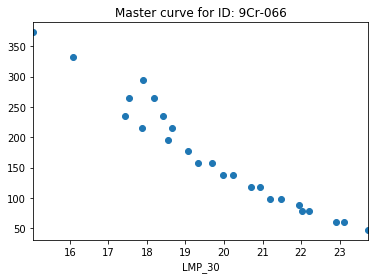

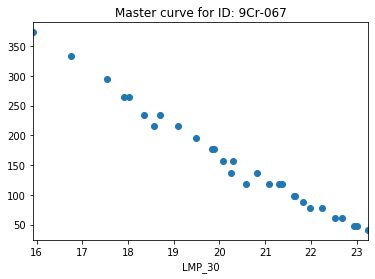

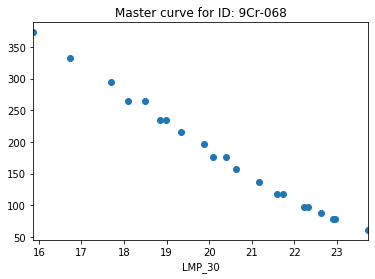

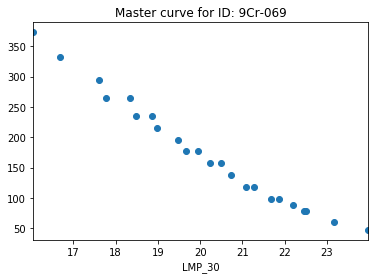

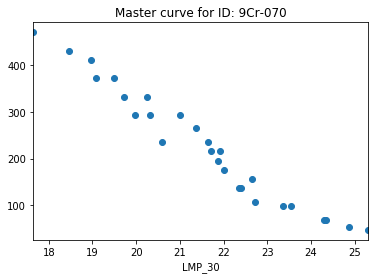

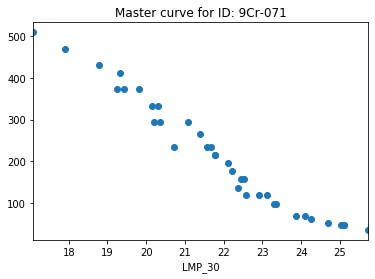

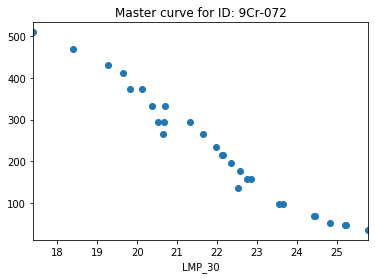

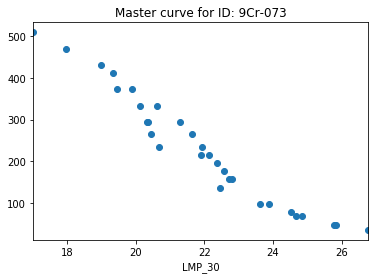

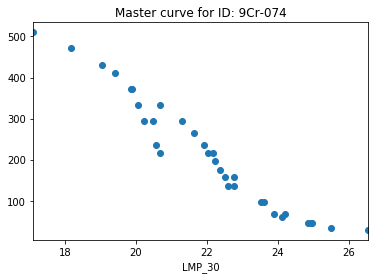

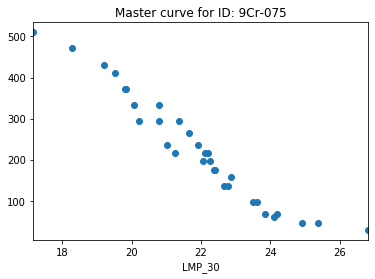

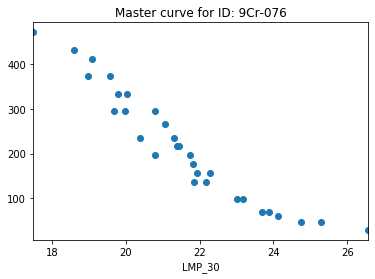

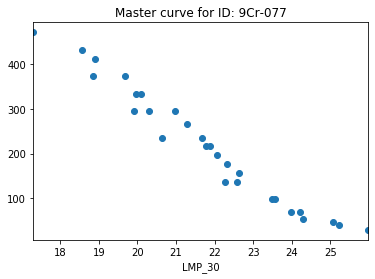

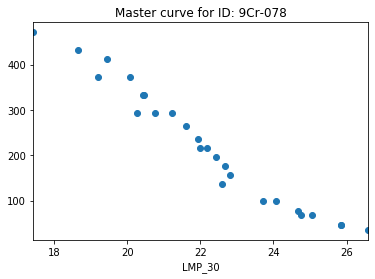

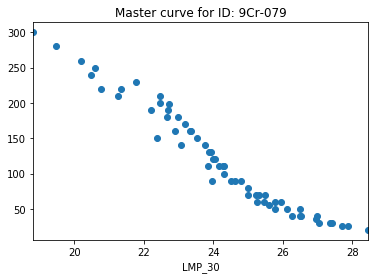

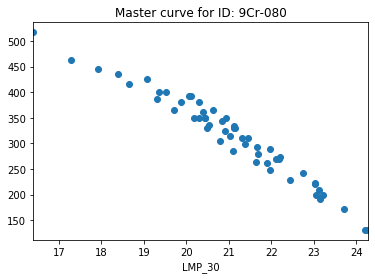

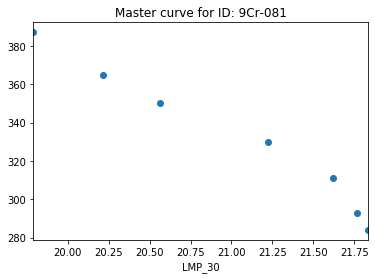

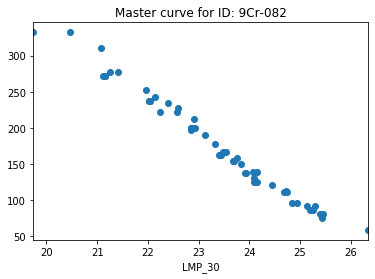

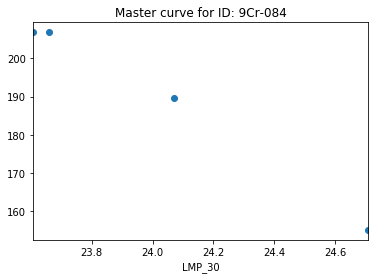

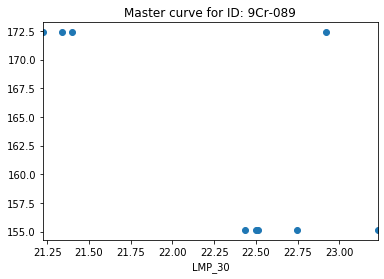

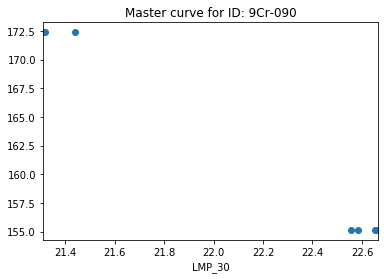

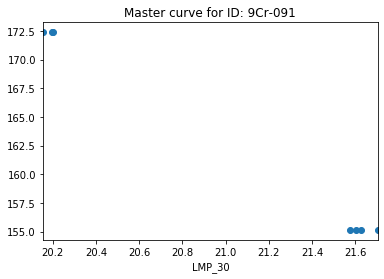

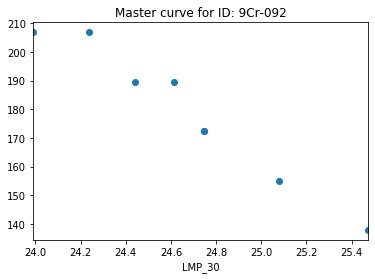

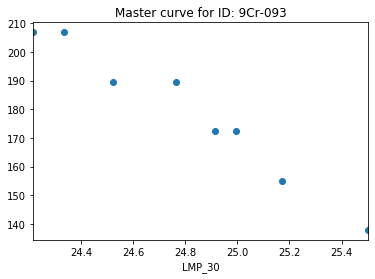

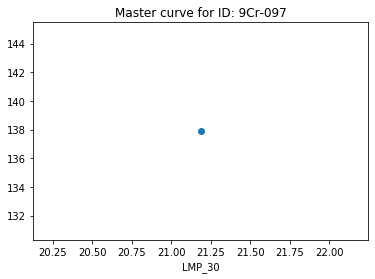

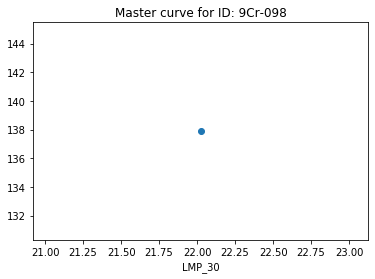

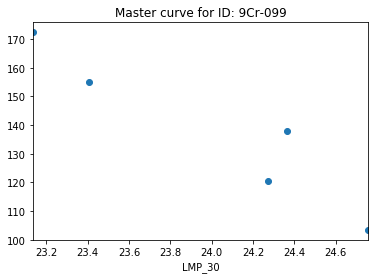

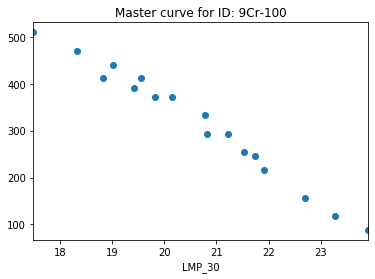

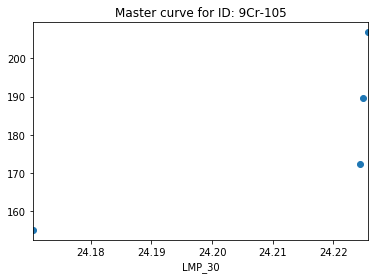

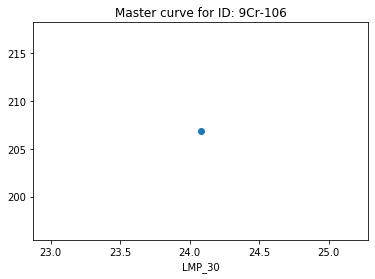

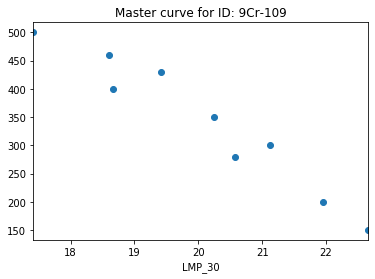

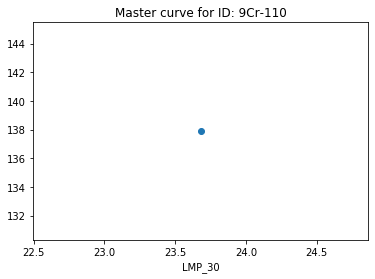

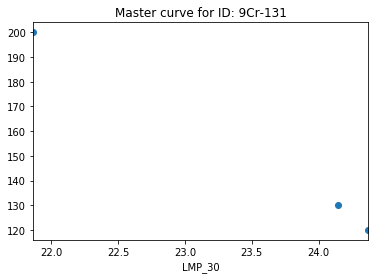

In [7]:
C=30
for k, g in data.groupby('ID'):
    g.plot(x='LMP_{}'.format(C), y='CT_CS', style='o', kind='line', title='Master curve for ID: {}'.format(k), legend=False)